In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("bank-additional-full.csv",sep=";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# bank-compain ----term deposit /not

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
#problem statement 

#certain bank contect a campain over a call 
#if a person is going to subscribe for the term deposit or not


#age ---age of person
#job---job of a person
#marital----marital status
#education---education of the person
#default---credit in default
#housing-----hosing loan
#loan---personal loan
#contact---communication type
#month----last contact year
#day of week---last contact of the week
#duration---last contact duration
#pdays---number of days passed by last contact
#previous ---number of contacts
#poutcome----out come of previous campaign
#emp.var.rate----employment variation rconsate -quarterly indicator
#cons.price.idx-----consumer price index--monthly indicator
#cons.conf.idx----costomer  confidence index--monthly indicator
#euribor3m---euribor (euro interbank offered)3 months rate---daly indicator
#nr.employed---number of employees--quarterly indicator
#y-----has the client subscribed to term deposit or not

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
data.shape

(41199, 21)

In [9]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
data.info()

#we can see
#total no of rows 
#range of data
#null values or not
#column name
#data type
#total no of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [11]:
data['y'].value_counts()  #yes repeat 4640 #no repeat 36556


no     36556
yes     4640
Name: y, dtype: int64

In [12]:
# missing value analysis----- checking for null values
# data is of 2 type 1 is numeric(numbers) another is catogirical(string)
# numeric(numbers) data we use mean or median(when there is a outlier go with median when there is no outlier go with mean/median)
#catogrical(string) mode

In [13]:
data.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [14]:
data['age']

0        56.0
1        57.0
2        37.0
3        40.0
4        56.0
         ... 
41194    74.0
41195    74.0
41196    74.0
41197     NaN
41198    74.0
Name: age, Length: 41199, dtype: float64

In [15]:
data=data.dropna()

In [16]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41193,94.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [17]:
data.shape

(41190, 21)

In [18]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [19]:
#altrinative step
#we wanted to handled the data


#col_list(data.columns)
#col_list.remove('y')
#for col in col_list:
#    if data['col'].dtype=='object':
#        data[col]=data[col].fillna(data[col].mode()[0])
#    else:
#        data[col]=data[col].fillna(data[col].median())
    

In [20]:
#outliers
col_list=list(data.columns)

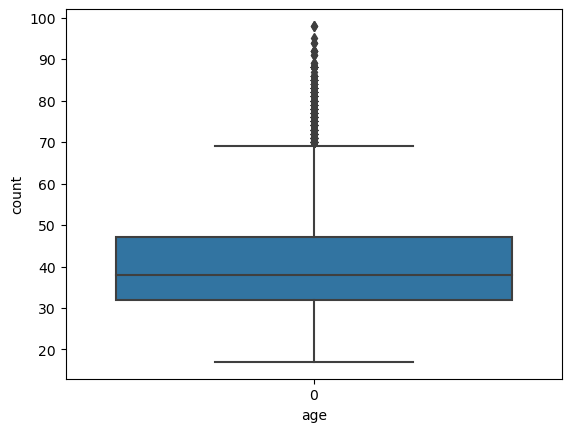

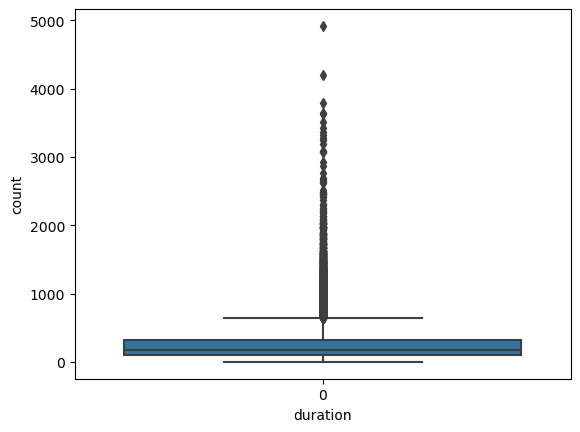

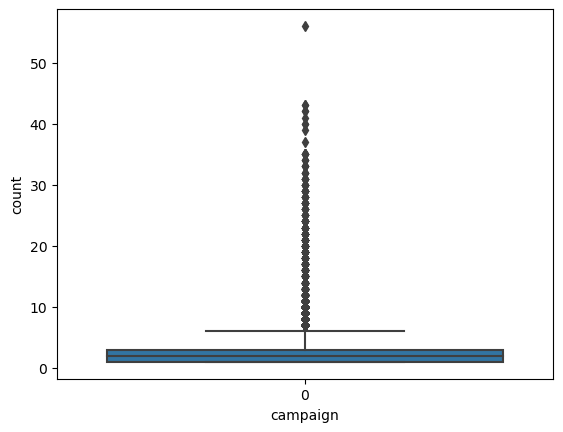

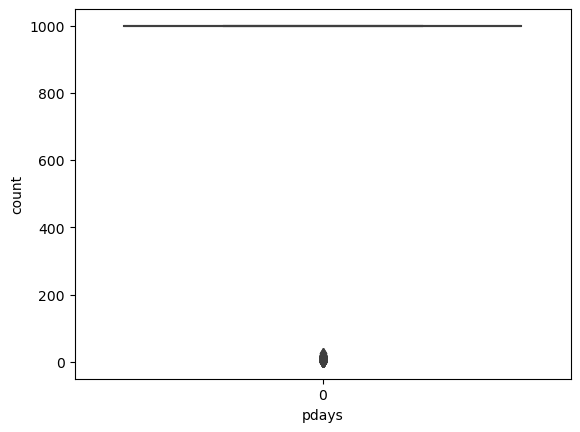

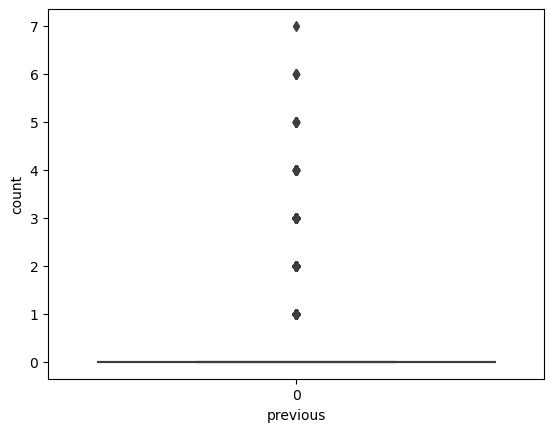

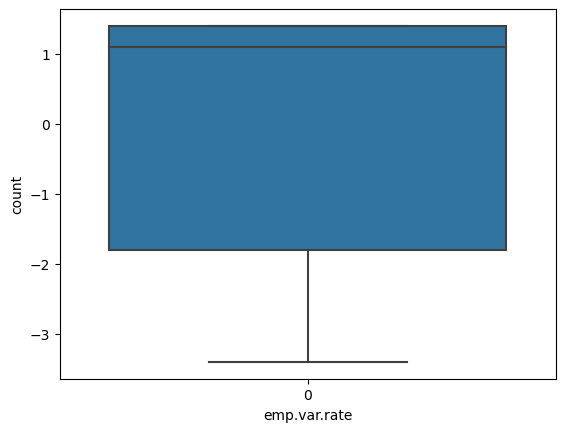

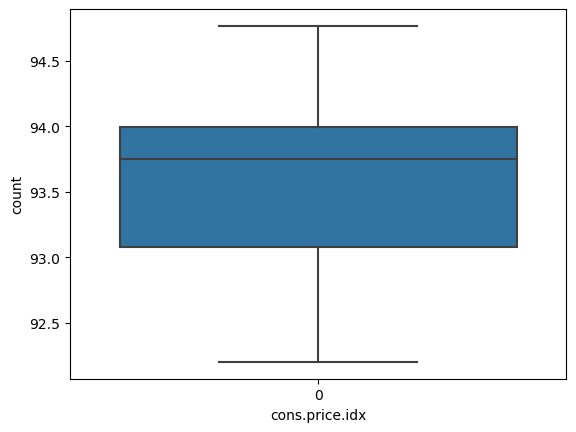

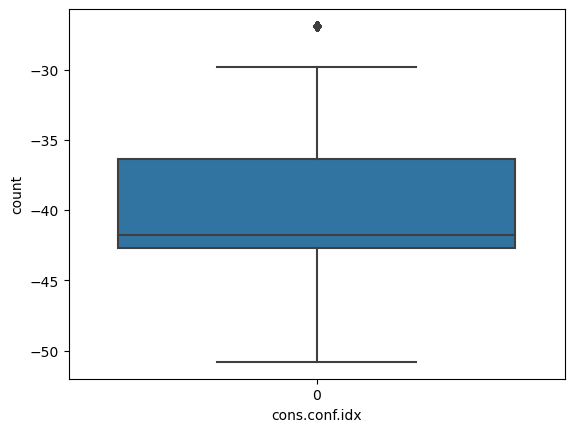

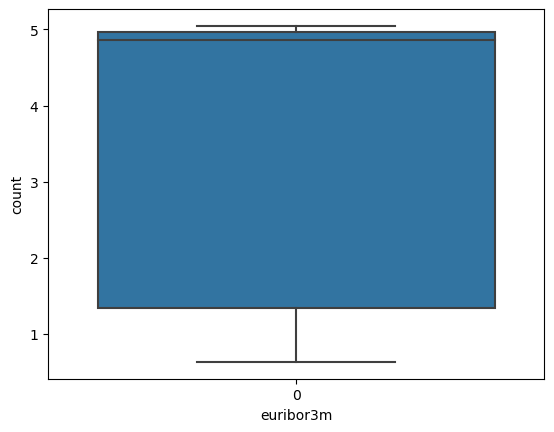

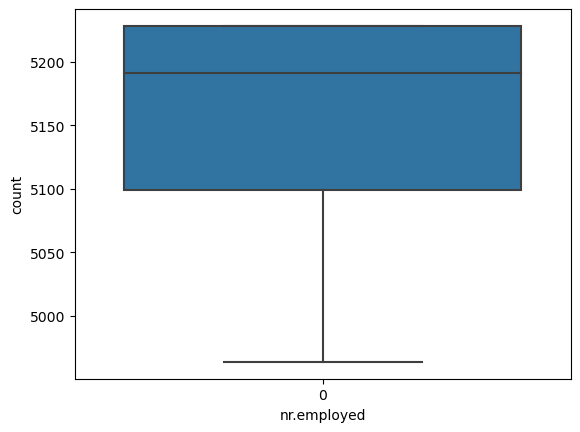

In [21]:
for col in col_list:
    if (data[col].dtype=='float64'):
        sns.boxplot(data[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()
    

In [22]:
q1=data.quantile(0.25)
q3=data.quantile(.75)
iqr=q3-q1


In [23]:
data=data[~((data<(q1-1.5*iqr))|(data>(q3+1.5*iqr))).any(axis=1)]

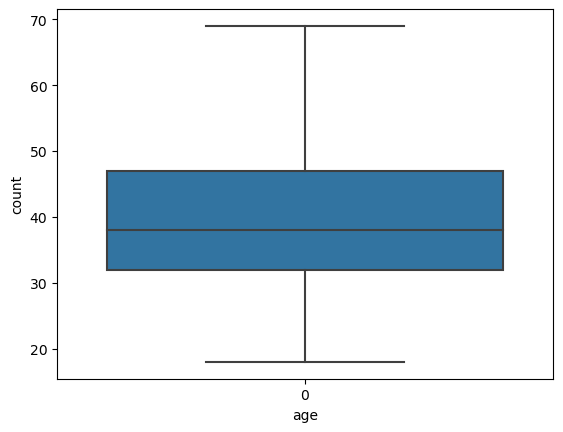

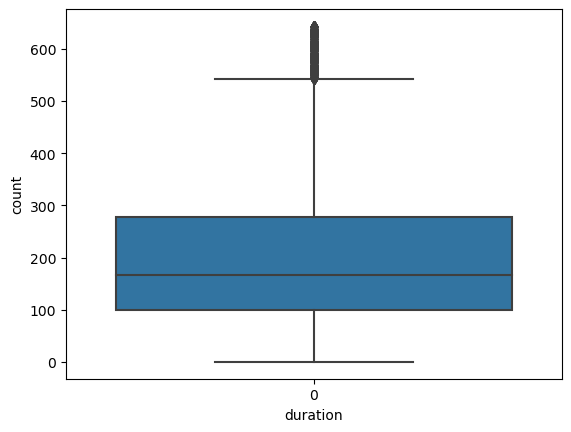

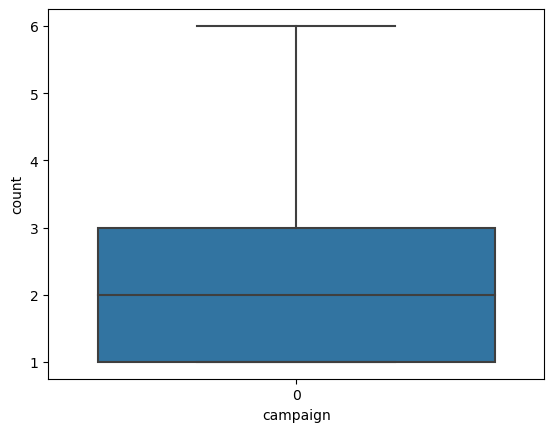

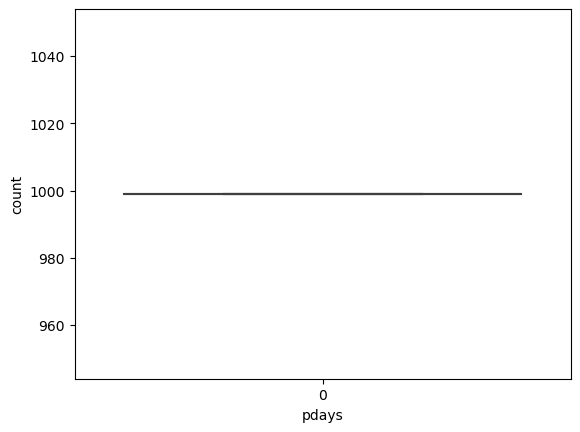

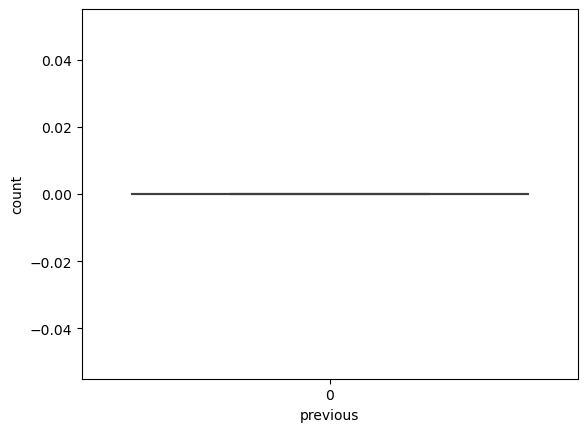

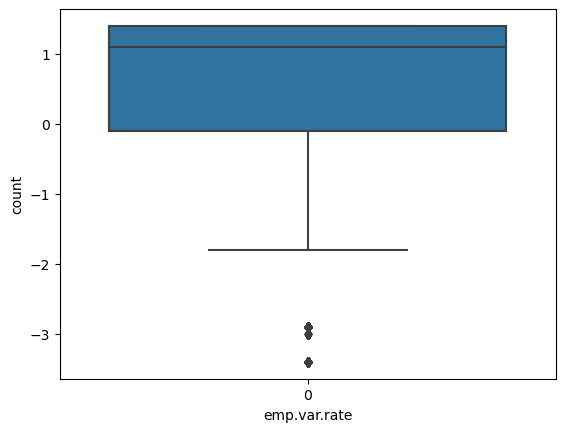

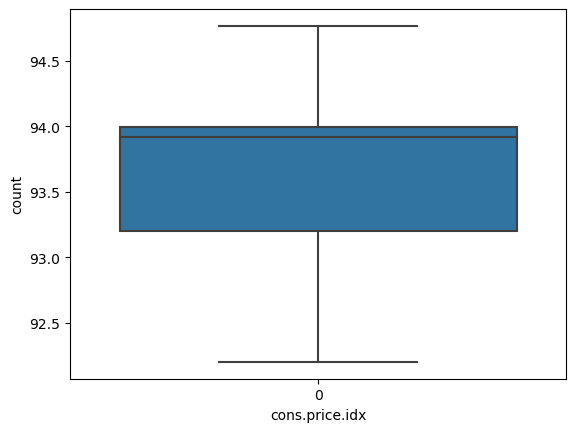

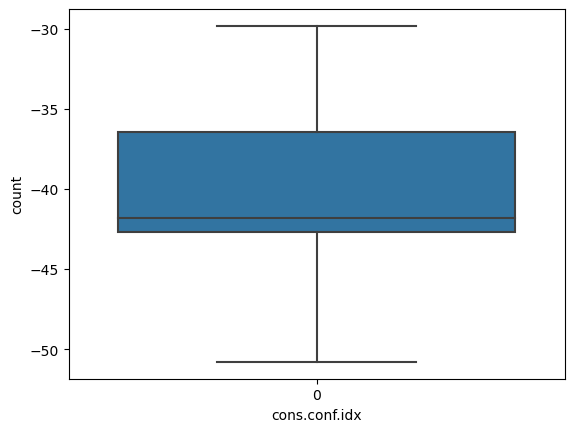

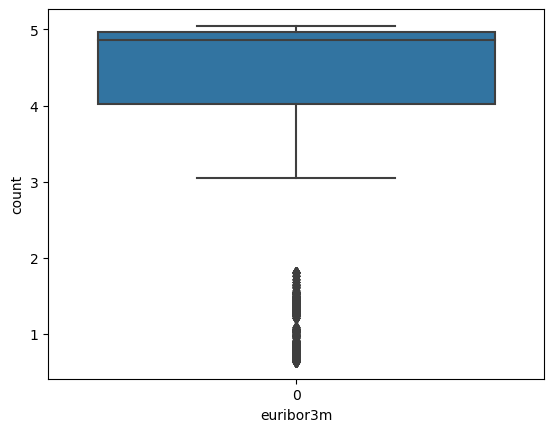

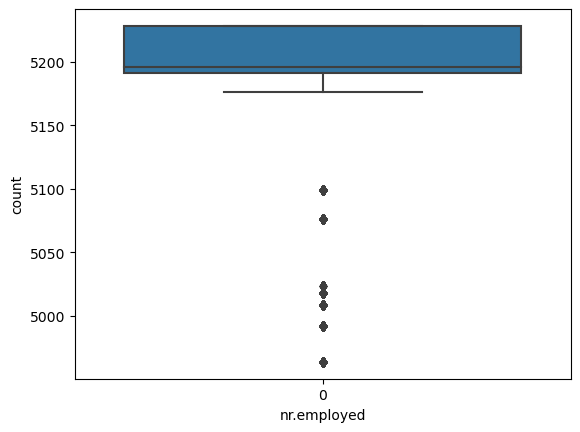

In [24]:
col_list=list(data.columns)

for col in col_list:
    if (data[col].dtype=='float64'):
        sns.boxplot(data[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [25]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
#encode string type  to numeric type for easier calculation 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col_list:
    if data[i].dtype=="object":
        data[i]=le.fit_transform(data[i])

In [27]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [28]:
#muliti colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [29]:
x=data[col_list]

In [30]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36.0,0,1,6,0,0,0,0,7,0,...,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37.0,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46.0,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0


In [33]:
col=[]
for i in data.columns:
    if((data[i].dtypes!='object')&(i!='y')):
        col.append(i)
        
x=data[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j)for j in range(len(x.columns))]
vif_data

,features,vif
0,age,1.229086
1,job,1.025393
2,marital,1.182211
3,education,1.102071
4,default,1.112275
5,housing,1.013127
6,loan,1.003024
7,contact,2.718272
8,month,2.063068
9,day_of_week,1.011325


In [34]:
data=data.drop('pdays',axis=1)

In [35]:
col=[]
for i in data.columns:
    if((data[i].dtypes!='object')&(i!='y')):
        col.append(i)
        
x=data[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j)for j in range(len(x.columns))]
vif_data

,features,vif
0,age,22.749800
1,job,2.095270
2,marital,5.610563
3,education,4.471501
4,default,1.436868
5,housing,2.192682
6,loan,1.208270
7,contact,3.588223
8,month,7.830533
9,day_of_week,3.107660


In [36]:
data=data.drop(['nr.employed'],axis=1)

In [37]:
col=[]
for i in data.columns:
    if((data[i].dtypes!='object')&(i!='y')):
        col.append(i)
        
x=data[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j)for j in range(len(x.columns))]
vif_data

,features,vif
0,age,22.749447
1,job,2.095230
2,marital,5.609584
3,education,4.471499
4,default,1.435616
5,housing,2.192065
6,loan,1.208170
7,contact,2.748061
8,month,6.764668
9,day_of_week,3.107058


In [38]:
data=data.drop(['cons.price.idx'],axis=1)

In [39]:
col=[]
for i in data.columns:
    if((data[i].dtypes!='object')&(i!='y')):
        col.append(i)
        
x=data[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j)for j in range(len(x.columns))]
vif_data

,features,vif
0,age,20.922223
1,job,2.087129
2,marital,5.377934
3,education,4.387092
4,default,1.435398
5,housing,2.187384
6,loan,1.207522
7,contact,2.513944
8,month,6.472615
9,day_of_week,3.082769


In [41]:
data=data.drop(['euribor3m'],axis=1)

In [42]:
col=[]
for i in data.columns:
    if((data[i].dtypes!='object')&(i!='y')):
        col.append(i)
        
x=data[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j)for j in range(len(x.columns))]
vif_data

,features,vif
0,age,17.603641
1,job,2.079159
2,marital,5.150678
3,education,4.199877
4,default,1.433830
5,housing,2.178631
6,loan,1.207295
7,contact,2.510035
8,month,5.781814
9,day_of_week,3.038628


In [43]:
data=data.drop(['cons.conf.idx'],axis=1)

In [44]:
col=[]
for i in data.columns:
    if((data[i].dtypes!='object')&(i!='y')):
        col.append(i)
        
x=data[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j)for j in range(len(x.columns))]
vif_data

,features,vif
0,age,9.689868
1,job,2.067445
2,marital,4.116292
3,education,4.049468
4,default,1.433827
5,housing,2.138872
6,loan,1.204034
7,contact,2.484177
8,month,5.320667
9,day_of_week,2.955953


In [45]:
data=data.drop(['age','previous','poutcome'],axis=1)

In [46]:
col=[]
for i in data.columns:
    if((data[i].dtypes!='object')&(i!='y')):
        col.append(i)
        
x=data[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j)for j in range(len(x.columns))]
vif_data

,features,vif
0,job,2.027048
1,marital,4.109666
2,education,3.727354
3,default,1.337452
4,housing,2.066146
5,loan,1.199312
6,contact,2.482828
7,month,4.858438
8,day_of_week,2.818011
9,duration,2.809123


In [47]:
#extract all column from vif

In [48]:
vif_data.features

0              job
1          marital
2        education
3          default
4          housing
5             loan
6          contact
7            month
8      day_of_week
9         duration
10        campaign
11    emp.var.rate
Name: features, dtype: object

In [49]:
ind_features=list(vif_data.features)

In [50]:
ind_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'emp.var.rate']

In [54]:
#extract the data converted into data frame
#extracting data from original dataset
   df_ind=data[ind_features]

In [55]:
df_ind

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.0,1.0,1.1
1,7,1,3,1,0,0,1,6,1,149.0,1.0,1.1
2,7,1,3,0,2,0,1,6,1,226.0,1.0,1.1
3,0,1,1,0,0,0,1,6,1,151.0,1.0,1.1
4,7,1,3,0,0,2,1,6,1,307.0,1.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...
41180,0,1,6,0,0,0,0,7,0,254.0,2.0,-1.1
41181,0,1,6,0,2,0,0,7,0,281.0,1.0,-1.1
41184,1,1,5,0,0,0,0,7,0,383.0,1.0,-1.1
41185,5,1,6,0,2,0,0,7,0,189.0,2.0,-1.1


In [56]:
df_dep=data['y']

In [57]:
from sklearn.model_selection import train_test_split


In [58]:
x_train,x_test,y_train,y_test=train_test_split(df_ind,df_dep,test_size=0.25,random_state=0)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr=LogisticRegression()

In [61]:
lr.fit(x_train,y_train)

LogisticRegression()

In [63]:
Test_pred=lr.predict(x_test)

In [64]:
from sklearn.metrics import *

In [71]:
accuracy_score(y_test,Test_pred)

0.9437417654808959

In [72]:
confusion_matrix(y_test,Test_pred)

array([[7096,   80],
       [ 347,   67]], dtype=int64)

In [73]:
(7096_67)/(7096+80+347+67)

93.50026350461133

In [74]:
print(classification_report(y_test,Test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7176
           1       0.46      0.16      0.24       414

    accuracy                           0.94      7590
   macro avg       0.70      0.58      0.60      7590
weighted avg       0.93      0.94      0.93      7590

